In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("insurance_data.csv")

In [38]:
import numpy as np

In [84]:
# m = 0.12482252, b = -4.9112779
# y = m*x + b
# y = (0.12482252) * x + (-4.9112779)

def f(x):
    z = (0.125 * x) - 4.9
    e = 2.7
    return 1 / (1 + e**(-z))
# # [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 55, 25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23]
# input = np.array([x for x in range(0, 100)])
# output = f(input)
# print(input)
# plt.figure(figsize=(10, 6))
# plt.plot(input, output)
# plt.title('y = 1 / (1 + e ^ -z), where z = 0.125*x - 4.9')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.grid(True)
# plt.axhline(y=0, color='k')
# plt.axvline(x=0, color='k')
# plt.show()
# # -------------------------------------------------------------------------
# plt.xlabel("Age")
# plt.ylabel("bought_Insurance")
# plt.scatter(x = df['age'], y = df['bought_insurance'], color = 'red')


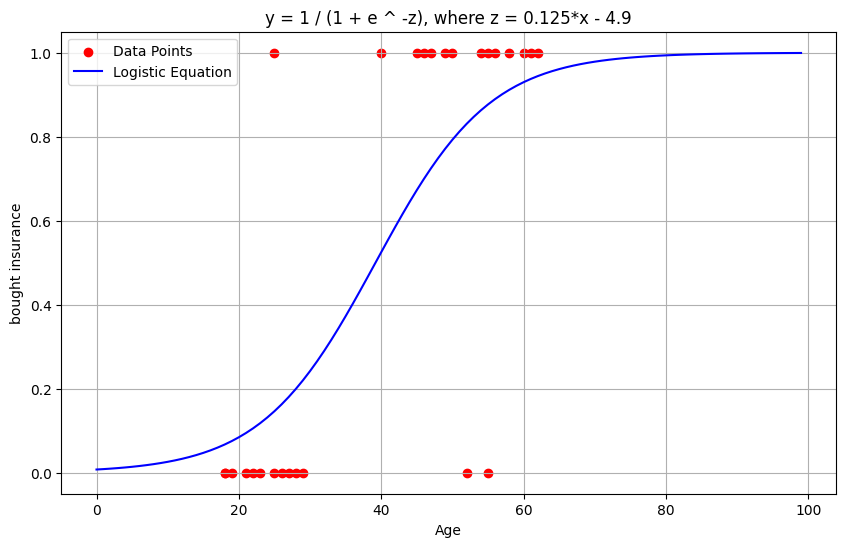

In [85]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the scatter points
plt.scatter(x = df['age'], y = df['bought_insurance'], color = 'red', label = 'Data points')

# Generate points for your equation
input = np.array([x for x in range(0, 100)])
output = f(input)  # Replace with your actual equation

# Plot the equation line
plt.plot(input, output, color = 'blue', label = 'Equation')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('bought insurance')
plt.title('y = 1 / (1 + e ^ -z), where z = 0.125*x - 4.9')

# Add a legend
plt.legend(['Data Points', 'Logistic Equation'])

# Display the plot
plt.grid(visible = True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# train_test_aplit method Returns 4 parameters
# that is, X_train, X_test, y_train, y_test

X = df[['age']]
y = df['bought_insurance']

# 90 % data is for Training, 10 % data is for Testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, shuffle = False)

X_test

,age
24,50
25,54
26,23


In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train) 
model.coef_, model.intercept_

(array([[0.12482252]]), array([-4.9112779]))

In [39]:
print(model.predict(X_test))   # Prediction
print(model.predict_proba(X_test))  # Probablities

[1 1 0]
[[0.20918447 0.79081553]
 [0.13834096 0.86165904]
 [0.88496991 0.11503009]]


# Excercise

In [117]:
hr_data = pd.read_csv("HR_comma_sep.csv")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
emp_left = hr_data[hr_data['left'] == 1]
emp_retained = hr_data[hr_data['left'] == 0]
emp_left.shape, emp_retained.shape

((3571, 10), (11428, 10))

In [20]:
# Deciding the key factors for a person to leave or stay

important_factors = ['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years']
hr_data.groupby('left')[important_factors].mean()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years
left,,,,
0,0.666810,199.060203,0.175009,0.026251
1,0.440098,207.419210,0.047326,0.005321


<Axes: xlabel='promotion_last_5years'>

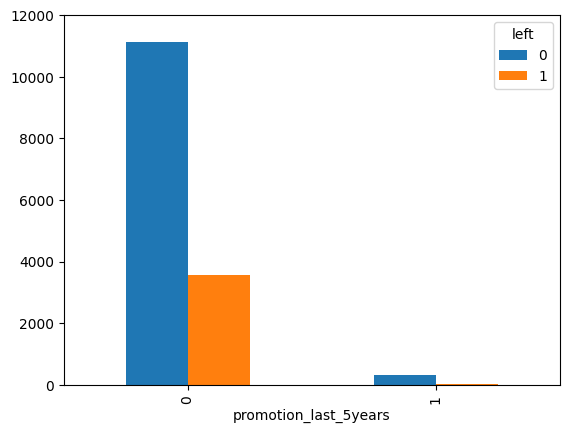

In [31]:
# Promotion Wise

pd.crosstab(hr_data['promotion_last_5years'], hr_data['left']).plot(kind = 'bar', ylim = (0, 12000))

<Axes: xlabel='salary'>

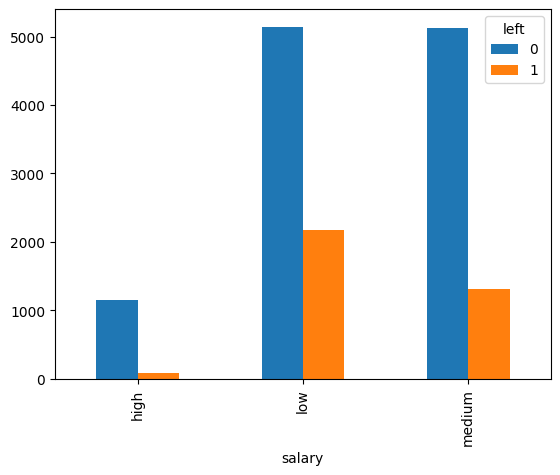

In [32]:
# Salary Wise

pd.crosstab(hr_data['salary'], hr_data['left']).plot(kind = 'bar')

(0.0, 4000.0)

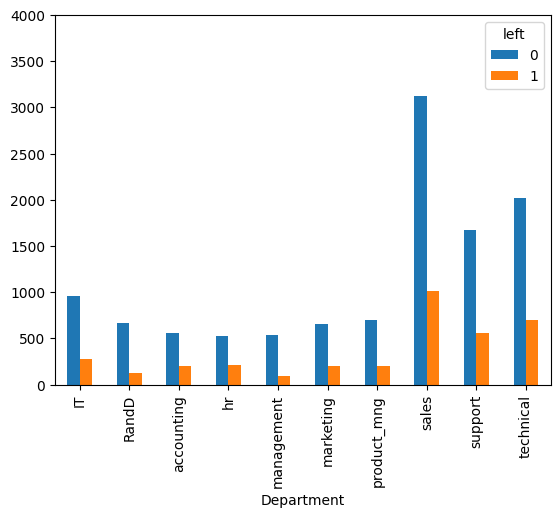

In [34]:
# Department Wise

ax = pd.crosstab(hr_data['Department'],hr_data['left']).plot(kind = 'bar')
ax.set_ylim(0, 4000)

# Observations
1. Satisfaction Level -> 0.66 (stay) v/s 0.44 (leave)
2. Average Monthly Hrours -> 199 hrs (stay) v/s 207 hrs (leave)
3. Work Accident -> 0.175 (stay) v/s 0.04 (leave)
4. promotion in last 5 yrs -> 0.026 (stay) v/s 0.005 (leave)
5. Salary
6. Department

In [120]:
salary_dummy = pd.get_dummies(hr_data['salary'])

mod_hr_data = hr_data.drop(['salary', 'last_evaluation', 'number_project', 'time_spend_company', 'left', 'Department'], axis = 'columns')
mod_hr_data = pd.concat([mod_hr_data, salary_dummy], axis = 'columns')

X = mod_hr_data
y = hr_data['left']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [128]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
reg.score(X_test, y_test)

0.7813333333333333

In [131]:
ans = reg.predict(X_test)
ans

array([0, 0, 0, ..., 0, 0, 0])